# Problem 2 - KNN hyperparameter tuning using cross validation 20 points
For this problem you should read the article at: https://www.analyticsvidhya.com/blog/2021/01/a-quick- introduction-to-k-nearest-neighbor-knn-classification-using-python/ to review how to work with K-Nearest Neighbor (KNN) in sklearn. We will use the same Social Network ads dataset that is used in this post. You will work with a 80-20 train-test split.
You will use KNN algorithm to predict whether an individual will buy a product or not. As discussed in the class, there are two hyperparameters: the number of neighbors $(K)$ and the distance metric. For distance between two n-dimensional points $\bar{x_1} = {x_{1,1}, x_{1,2}, . . . , x_{1,n}}$ and $\bar{x_2} = {x_{2,1}, x_{2,2}, . . . , x_{2,n}}$ we consider Minkowski distance given by:

$( \sum_{i=1}^{n} |x_{1,i}-x_{2,i}|^p)^{\frac{1}{p}}$

where p is a parameter. For p = 2, this distance is same as Euclidean distance and for p = 1 it is called
Manhattan distance.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn



### 1-
With K = 4 and p = 2 train a KNN classifier and evaluate its misclassification error, Accuracy,
Precision, Recall, F-1 score on the test set.

In [6]:
dataset = pd.read_csv('Social_Network_Ads.csv')
# getting the columns that contain our predictors. Our Xs.
X = dataset.iloc[:, [1, 2, 3]].values
# getting the last columns which is the coluns we are trying to predict
y = dataset.iloc[:, -1].values
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [59]:
# Some of our data is on string format. We must use LabelEncoder to 
# make it possible to be used on KNN.

from sklearn.preprocessing import LabelEncoder
# Calling the Lable encoder object 
le = LabelEncoder()
# applying the lable encoder into the column of index 0
X[:,0] = le.fit_transform(X[:,0])


In [60]:
'''As specified in the question, we must split our dataset into 80% training and 20% test
'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# the step of feature scalling that we learned on Andrew Ng class.
X_train = sc.fit_transform(X_train) 
# what is the difference between these 2 functions?
# why are they difference for the test and for training.

X_test = sc.transform(X_test)

In [62]:

from sklearn.neighbors import KNeighborsClassifier
# classfiying the traininig dataset
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
# predicting 
y_pred = classifier.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score
# creating a confusion matrix based on the test values and predicted values. 
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
cm

array([[56,  2],
       [ 2, 20]])

In [64]:
""" Now we must calculate the  misclassification error, Accuracy,
Precision, Recall, F-1 score"""

true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]

misclassigication_error = (false_negative+false_negative)/len(y_test)
print("Misclassigication Error:",misclassigication_error)

print("Accuracy:",accuracy)

precision = true_positive / (true_positive+false_positive)
print("Precision:",precision)

recall = true_positive / (true_positive+false_negative)
print("Recall:",recall)

f1_score = 2*((precision*recall)/(precision+recall))
print("F1 score:",f1_score)

Misclassigication Error: 0.05
Accuracy: 0.95
Precision: 0.9655172413793104
Recall: 0.9655172413793104
F1 score: 0.9655172413793104


### 2- 
You will use 5-fold cross-validation to identify the best value of K. First fix p = 1 and for K ∈ [1,2,...,15] calculate the misclassification error and plot it as a function of K for different values of K.

In [88]:
from sklearn.model_selection import cross_validate
# this is a cross_validation function that returns only the misclassification 

def cross_validation_KNN(k, _X, _y,_p, _cv=5):
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = _p)
      results = cross_validate(estimator=classifier,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      return (1-results["test_accuracy"]).mean()
      


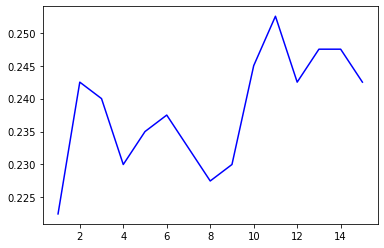

In [91]:
import matplotlib.pyplot as plt
k_misscalc = {}
for i in range(1,16):
    misclassifying = cross_validation_KNN(i, X, y,1, _cv=5)
    k_misscalc[i] = misclassifying
    
Ks = [ int(i) for i in k_misscalc.keys()]
plt.plot(Ks,list(k_misscalc.values()), 'b')
plt.show()

In [93]:
k_misscalc.values()

dict_values([0.2225, 0.2425, 0.24, 0.22999999999999998, 0.23499999999999996, 0.2375, 0.2325, 0.22749999999999998, 0.22999999999999998, 0.24500000000000002, 0.2525, 0.2425, 0.2475, 0.2475, 0.24250000000000002])

### 3-
Next fix p = 2 and again using 5-fold cross-validation for K ∈ [1, 2, . . . , 15] calculate the misclassification error and plot it as a function of K. This should be plotted in the same graph as for p = 1 in part 2 of this problem. 

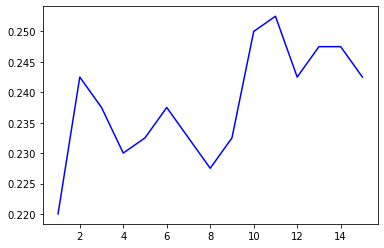

In [94]:
import matplotlib.pyplot as plt
k_misscalc = {}
for i in range(1,16):
    misclassifying = cross_validation_KNN(i, X, y,2, _cv=5)
    k_misscalc[i] = misclassifying
    
Ks = [ int(i) for i in k_misscalc.keys()]
plt.plot(Ks,list(k_misscalc.values()), 'b')
plt.show()

In [95]:
k_misscalc.values()

dict_values([0.22000000000000003, 0.2425, 0.2375, 0.22999999999999998, 0.2325, 0.2375, 0.2325, 0.22749999999999998, 0.2325, 0.25, 0.2525, 0.2425, 0.2475, 0.2475, 0.24250000000000002])

### 4- 
What is the best value of K with Eucledian distance? Is this value the same with Manhattan distance? What combination of p and K gives the best classifier (one with the minimum misclassification error).

Value of p= 2 and k =1